In [232]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Tourism, Air Travel and Hotel Occupancy in Lebanon

## Data

1. UNWTO: The UNWTO collects data for all the countries across the world. For Lebanon, its source is the Ministère du Tourisme. Complete details of their methodology can be found [here](https://www.e-unwto.org/doi/book/10.18111/9789284423606)

2. Global Aviation Dashboard: This is an initative of the [World Bank](https://www.worldbank.org/en/programs/global-aviation-dashboard/table). It visualizes aggregated data on commercial flight movements around the world. The dashboard is powered by a unique dataset that draws on information supplied by flightradar24, ch-aviation, and various other sources. 

In [233]:
data = pd.read_excel('../../data/aviation/daily_flights_to_and_from_syria.xlsx')

In [244]:
mena = pd.read_excel('../../data/aviation/mena_flights.xlsx')

In [416]:
inbound_flights_mena = mena[mena['destination_country']=='Lebanon']
inbound_flights_mena['date'] = inbound_flights_mena['date'].apply(lambda x: pd.to_datetime(x))
inbound_flights_mena_monthly = inbound_flights_mena.groupby([pd.Grouper(key='date', freq='M'), 'destination_country', 'origin_country'])['total_flights', 'total_seats'].sum().reset_index()
inbound_flights_mena_yearly = inbound_flights_mena.groupby([pd.Grouper(key='date', freq='Y'), 'destination_country', 'origin_country'])['total_flights', 'total_seats'].sum().reset_index()
inbound_flights_mena_yearly['date'] = pd.to_datetime(inbound_flights_mena_yearly['date'].dt.year, format = '%Y')

inbound_flights_mena_monthly_all = inbound_flights_mena.groupby([pd.Grouper(key='date', freq='M'), 'destination_country'])['total_flights', 'total_seats'].sum().reset_index()

inbound_flights_mena_yearly_all = inbound_flights_mena.groupby([pd.Grouper(key='date', freq='Y'), 'destination_country'])['total_flights', 'total_seats'].sum().reset_index()
inbound_flights_mena_yearly_all['date'] = pd.to_datetime(inbound_flights_mena_yearly_all['date'].dt.year, format = '%Y')


C:\Users\sahit\AppData\Local\Temp\ipykernel_4940\2131385457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inbound_flights_mena['date'] = inbound_flights_mena['date'].apply(lambda x: pd.to_datetime(x))
C:\Users\sahit\AppData\Local\Temp\ipykernel_4940\2131385457.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  inbound_flights_mena_monthly = inbound_flights_mena.groupby([pd.Grouper(key='date', freq='M'), 'destination_country', 'origin_country'])['total_flights', 'total_seats'].sum().reset_index()
C:\Users\sahit\AppData\Local\Temp\ipykernel_4940\2131385457.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecat

In [426]:
inbound_flights_mena_monthly_ask = inbound_flights_mena.groupby([pd.Grouper(key='date', freq='M'), 'destination_country'])['total_payload', 'total_ask'].mean().reset_index()

inbound_flights_mena_yearly_ask = inbound_flights_mena.groupby([pd.Grouper(key='date', freq='Y'), 'destination_country'])['total_payload', 'total_ask'].mean().reset_index()
inbound_flights_mena_yearly_ask['date'] = pd.to_datetime(inbound_flights_mena_yearly_all['date'].dt.year, format = '%Y')

C:\Users\sahit\AppData\Local\Temp\ipykernel_4940\1880962149.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  inbound_flights_mena_monthly_ask = inbound_flights_mena.groupby([pd.Grouper(key='date', freq='M'), 'destination_country'])['total_payload', 'total_ask'].mean().reset_index()
C:\Users\sahit\AppData\Local\Temp\ipykernel_4940\1880962149.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  inbound_flights_mena_yearly_ask = inbound_flights_mena.groupby([pd.Grouper(key='date', freq='Y'), 'destination_country'])['total_payload', 'total_ask'].mean().reset_index()


## Findings

### Analysing average Payload and Available Seat Kilometres on inbound flights

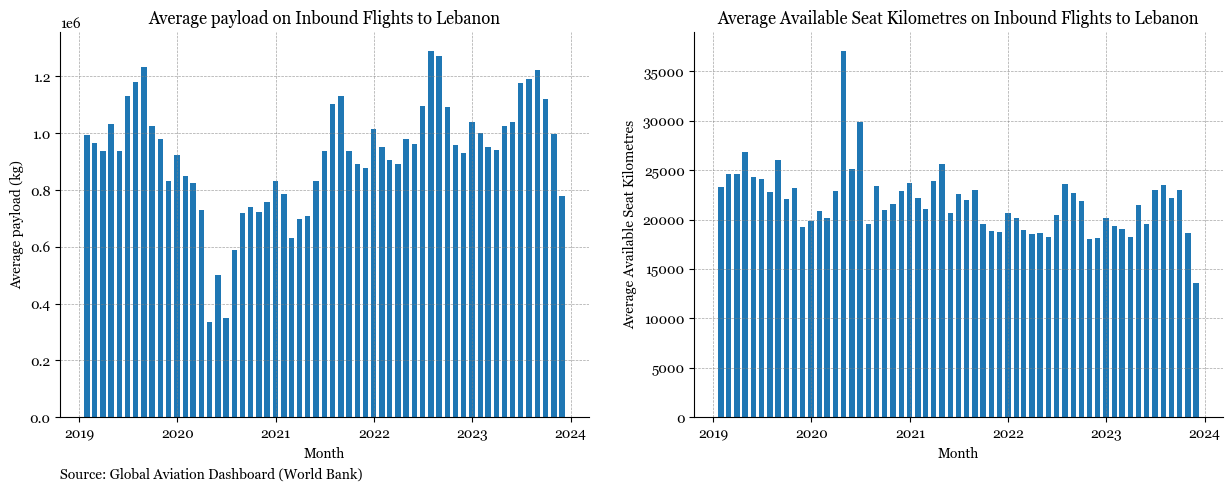

In [435]:
fig, axs = plt.subplots(1,2, figsize = (15,5))
plt.rcParams["font.family"] = "Georgia"
# inbound_tourism.plot(ax=ax, label = 'Inbound Tourism')
# inbound_tourism_by_air.plot(ax=ax)


axs[0].bar(x=inbound_flights_mena_monthly_ask['date'], height = inbound_flights_mena_monthly_ask['total_ask'], width = 20)
axs[1].bar(x=inbound_flights_mena_monthly_ask['date'], height = inbound_flights_mena_monthly_ask['total_payload'], width = 20)


#legend_without_title = ax.legend(title=None, loc='upper left', frameon=False)

for ax in axs:
    # Hide the right and top spines (axis lines)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ax.grid(which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

    axs[0].set_title('Average payload on Inbound Flights to Lebanon', font = 'Georgia', fontsize=12)
    axs[1].set_title('Average Available Seat Kilometres on Inbound Flights to Lebanon', font = 'Georgia', fontsize=12)

    ax.set_xlabel('Month')
    axs[0].set_ylabel('Average payload (kg)')
    axs[1].set_ylabel('Average Available Seat Kilometres')

subtitle = 'Source: Global Aviation Dashboard (World Bank)'
axs[0].text(0, -0.15, subtitle, ha='left', va='center', transform=axs[0].transAxes,
        fontsize=10, color='black', weight='normal');


### Analysing seats on inbound flights

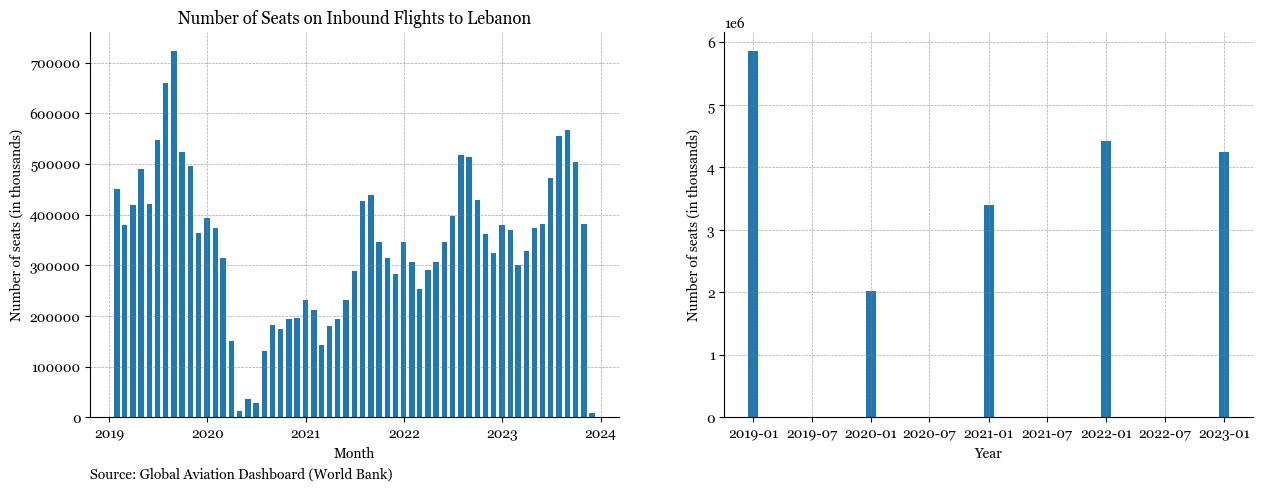

In [418]:
fig, axs = plt.subplots(1,2, figsize = (15,5))
plt.rcParams["font.family"] = "Georgia"
# inbound_tourism.plot(ax=ax, label = 'Inbound Tourism')
# inbound_tourism_by_air.plot(ax=ax)


axs[0].bar(x=inbound_flights_mena_monthly_all['date'], height = inbound_flights_mena_monthly_all['total_seats'], width = 20)
axs[1].bar(x=inbound_flights_mena_yearly_all['date'], height = inbound_flights_mena_yearly_all['total_seats'], width = 30)


#legend_without_title = ax.legend(title=None, loc='upper left', frameon=False)

for ax in axs:
    # Hide the right and top spines (axis lines)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ax.grid(which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

    axs[0].set_title('Number of Seats on Inbound Flights to Lebanon', font = 'Georgia', fontsize=12)
    axs[0].set_xlabel('Month')
    axs[1].set_xlabel('Year')
    ax.set_ylabel('Number of seats (in thousands)')

subtitle = 'Source: Global Aviation Dashboard (World Bank)'
axs[0].text(0, -0.15, subtitle, ha='left', va='center', transform=axs[0].transAxes,
        fontsize=10, color='black', weight='normal');


In [394]:
top_categories_seats = inbound_flights_mena_yearly.groupby('date').apply(lambda x: x.nlargest(5, 'total_seats')).reset_index(drop=True)
top_categories_seats['date'] = top_categories_seats['date'].dt.year
top_categories_flights = inbound_flights_mena_yearly.groupby('date').apply(lambda x: x.nlargest(5, 'total_flights')).reset_index(drop=True)
top_categories_flights['date'] = top_categories_flights['date'].dt.year

In [401]:
country_color_map = {
    'Turkey': '#e6194b',               # Red
    'United Arab Emirates (the)': '#3cb44b',   # Green
    'Saudi Arabia': '#ffe119',         # Yellow
    'Qatar': '#4363d8',                # Blue
    'France': '#f58231',               # Orange
    'Iraq': '#911eb4',                 # Purple
    'Germany': '#42d4f4'    ,           # Cyan
    'Egypt': '#f032e6'
}

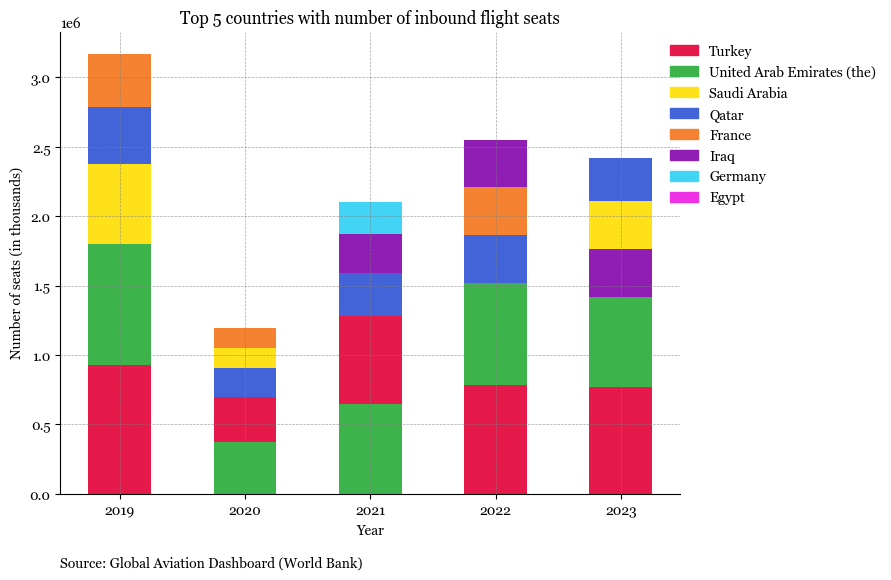

In [422]:
import numpy as np
import matplotlib.patches as mpatches


df = top_categories_seats
sorted_df = df.sort_values(by=['date', 'total_seats'], ascending=[True, False])

# Unique years and categories
years = sorted_df['date'].unique()


fig, ax = plt.subplots(figsize=(8,6))
bar_width = 0.5
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
          '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabed4']
# Plotting each category
for i, year in enumerate(years):
    bottom = np.zeros(len(years))
    sorted_df = df[df['date']==year].sort_values(by='total_seats', ascending = False)
    categories = sorted_df['origin_country'].unique()
    
    for j, category in enumerate(categories):
        value = sorted_df[(sorted_df['date'] == year) & (sorted_df['origin_country'] == category)]['total_seats'].sum()
        if value > 0:
            ax.bar(year, value, bar_width, bottom=bottom[i], color=country_color_map[category], label=category if i == 0 else "")
            bottom[i] += value


ax.set_xlabel('Year')
ax.set_ylabel('Number of seats (in thousands)')

legend_patches = [mpatches.Patch(color=color, label=country) for country, color in country_color_map.items()]
ax.legend(handles=legend_patches,loc = 'upper center', frameon=False, bbox_to_anchor=(1.15,1))

# Hide the right and top spines (axis lines)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.grid(which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

ax.set_title('Top 5 countries with number of inbound flight seats')
plt.xticks(rotation=0)

subtitle = 'Source: Global Aviation Dashboard (World Bank)'
ax.text(0, -0.15, subtitle, ha='left', va='center', transform=ax.transAxes,
        fontsize=10, color='black', weight='normal');

### Analysing number of inbound flights

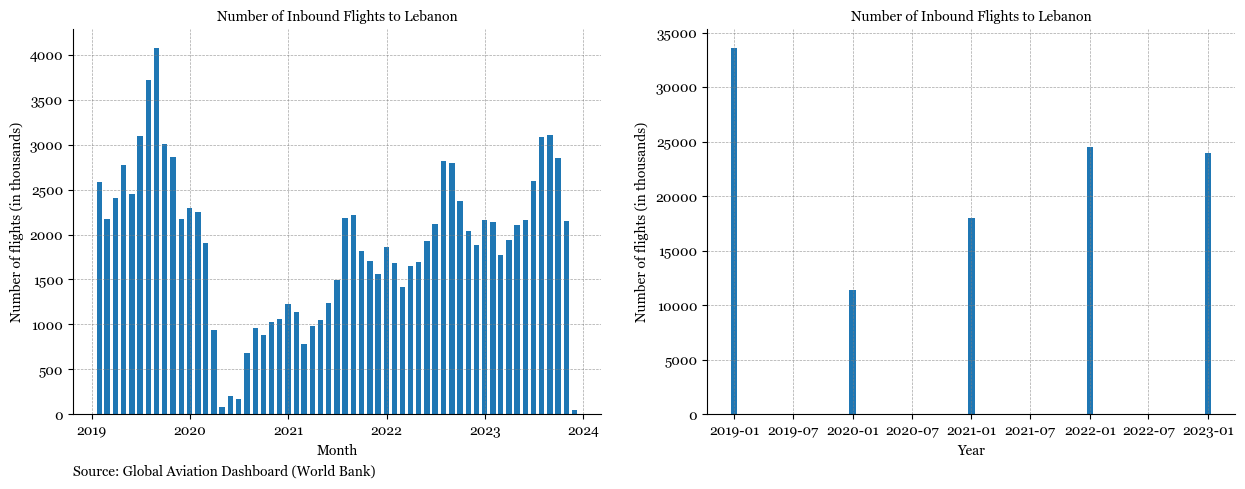

In [407]:
fig, axs = plt.subplots(1,2, figsize = (15,5))
plt.rcParams["font.family"] = "Georgia"
# inbound_tourism.plot(ax=ax, label = 'Inbound Tourism')
# inbound_tourism_by_air.plot(ax=ax)

axs[0].bar(x=inbound_flights_mena_monthly_all['date'], height = inbound_flights_mena_monthly_all['total_flights'], width = 20)
axs[1].bar(x=inbound_flights_mena_yearly_all['date'], height = inbound_flights_mena_yearly_all['total_flights'], width = 20)


#legend_without_title = ax.legend(title=None, loc='upper left', frameon=False)

for ax in axs:
    # Hide the right and top spines (axis lines)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ax.grid(which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

    ax.set_title('Number of Inbound Flights to Lebanon', font = 'Georgia')
    axs[0].set_xlabel('Month')
    axs[1].set_xlabel('Year')
    ax.set_ylabel('Number of flights (in thousands)')

subtitle = 'Source: Global Aviation Dashboard (World Bank)'
axs[0].text(0, -0.15, subtitle, ha='left', va='center', transform=axs[0].transAxes,
        fontsize=10, color='black', weight='normal');


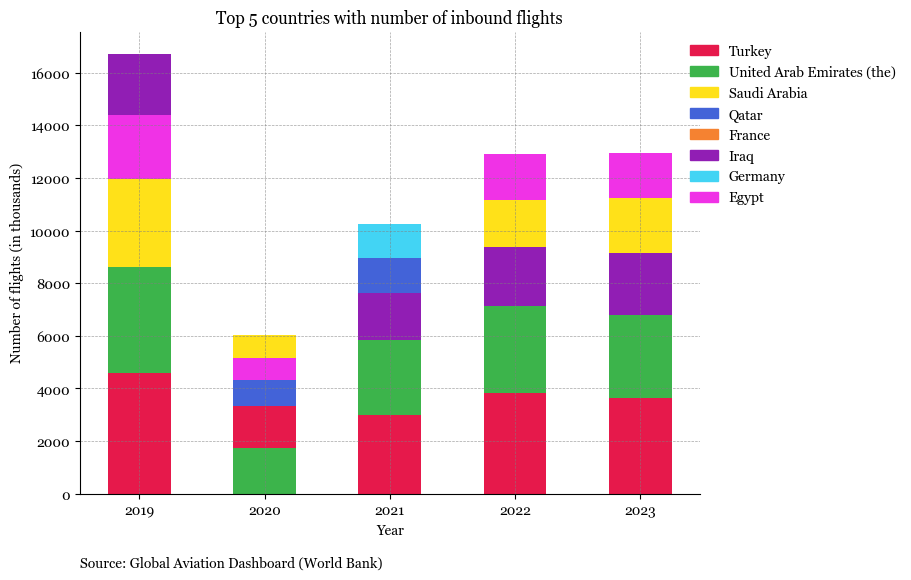

In [423]:
import numpy as np

df = top_categories_flights
sorted_df = df.sort_values(by=['date', 'total_flights'], ascending=[True, False])

#pivot_df = sorted_df.pivot_table(index='date', columns='origin_country', values='total_seats', fill_value=0)


# Unique years and categories
years = sorted_df['date'].unique()


# Preparing the plot
fig, ax = plt.subplots(figsize=(8,6))
bar_width = 0.5
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
          '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabed4']
# Plotting each category
for i, year in enumerate(years):
    bottom = np.zeros(len(years))
    sorted_df = df[df['date']==year].sort_values(by='total_flights', ascending = False)
    categories = sorted_df['origin_country'].unique()
    
    for j, category in enumerate(categories):
        value = sorted_df[(sorted_df['date'] == year) & (sorted_df['origin_country'] == category)]['total_flights'].sum()
        if value > 0:
            ax.bar(year, value, bar_width, bottom=bottom[i], color=country_color_map[category], label=category if i == 0 else "")
            bottom[i] += value

ax.set_xlabel('Year')
ax.set_ylabel('Number of flights (in thousands)')

legend_patches = [mpatches.Patch(color=color, label=country) for country, color in country_color_map.items()]
ax.legend(handles=legend_patches,loc = 'upper center', frameon=False, bbox_to_anchor=(1.15,1))

# Hide the right and top spines (axis lines)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.grid(which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

ax.set_title('Top 5 countries with number of inbound flights')
plt.xticks(rotation=0)
subtitle = 'Source: Global Aviation Dashboard (World Bank)'
ax.text(0, -0.15, subtitle, ha='left', va='center', transform=ax.transAxes,
        fontsize=10, color='black', weight='normal');

In [236]:
inbound_tourism_overnight = pd.read_excel('../../data/aviation/All_Countries_Inbound_Tourism_1995_2021.xlsx', skiprows=5, sheet_name='1.2')
inbound_tourism_excursions = pd.read_excel('../../data/aviation/All_Countries_Inbound_Tourism_1995_2021.xlsx', skiprows=5, sheet_name='1.3')
inbound_tourism_cruise = pd.read_excel('../../data/aviation/All_Countries_Inbound_Tourism_1995_2021.xlsx', skiprows=5, sheet_name='1.4')

hotel_occupancy_guests = pd.read_excel('../../data/aviation/All_Countries_Inbound_Tourism_Accommodation_1995_2021.xlsx', skiprows=5, sheet_name = '1.31')
hotel_occupancy_overnights = pd.read_excel('../../data/aviation/All_Countries_Inbound_Tourism_Accommodation_1995_2021.xlsx', skiprows=5, sheet_name = '1.32')
inbound_tourism_by_nationality = pd.read_excel('../../data/aviation/Arrivals_NonResident_Tourists_by_Nationality_2017_2021.xlsx')

inbound_tourism_mode_of_transport = pd.read_excel('../../data/aviation/All_Countries_Arrival_Mode_of_Transport.xlsx', skiprows=5)
inbound_tourism_by_air = pd.read_excel('../../data/aviation/All_Countries_Arrival_Mode_of_Transport.xlsx', skiprows=5, sheet_name = '1.20')

In [237]:

hotel_occupancy_guests = hotel_occupancy_guests[hotel_occupancy_guests['COUNTRY']=='Lebanon']
hotel_occupancy_guests['COUNTRY'] = hotel_occupancy_guests['COUNTRY'].replace({'Lebanon':'Guests'})
hotel_occupancy_overnights = hotel_occupancy_overnights[hotel_occupancy_overnights['COUNTRY']=='Lebanon']
hotel_occupancy_overnights['COUNTRY'] = hotel_occupancy_overnights['COUNTRY'].replace({'Lebanon':'Overnights'})
hotel_occupancy = pd.concat([hotel_occupancy_guests, hotel_occupancy_overnights])

hotel_occupancy.drop(columns = 'COD.', inplace=True)
hotel_occupancy = hotel_occupancy.set_index('COUNTRY').T

hotel_occupancy.reset_index(inplace=True)
hotel_occupancy.rename(columns = {'Lebanon':'Hotel Occupancy (Total)', 'index':'Year'}, inplace=True)
hotel_occupancy.set_index('Year', inplace=True)

In [238]:
hotel_occupancy.reset_index(inplace=True)
hotel_occupancy['Total Accommodation'] = hotel_occupancy['Guests'].replace({'..':None}).astype(float).fillna(0) + hotel_occupancy['Overnights'].replace({'..':None}).astype(float)

In [239]:
inbound_tourism_mode_of_transport = inbound_tourism_mode_of_transport[inbound_tourism_mode_of_transport['COUNTRY']=='Lebanon']
inbound_tourism_mode_of_transport.drop(columns = 'COD.', inplace=True)
inbound_tourism_mode_of_transport = inbound_tourism_mode_of_transport.set_index('COUNTRY').T

inbound_tourism_by_air = inbound_tourism_by_air[inbound_tourism_by_air['COUNTRY']=='Lebanon']
inbound_tourism_by_air.drop(columns = 'COD.', inplace=True)
inbound_tourism_by_air = inbound_tourism_by_air.set_index('COUNTRY').T

In [240]:
inbound_tourism = pd.concat([inbound_tourism_overnight])
inbound_tourism = inbound_tourism[inbound_tourism['COUNTRY']=='Lebanon']
inbound_tourism.drop(columns = 'COD.', inplace=True)
inbound_tourism = inbound_tourism.set_index('COUNTRY').T

inbound_tourism.reset_index(inplace=True)
inbound_tourism.rename(columns = {'Lebanon':'Inbound Tourism (Total)', 'index':'Year'}, inplace=True)
inbound_tourism.set_index('Year', inplace=True)


In [241]:
inbound_tourism_by_air['Lebanon'] = inbound_tourism_by_air['Lebanon'].replace('..', None)
inbound_tourism_by_air['Lebanon'] = inbound_tourism_by_air['Lebanon'].astype(float)
inbound_tourism_by_air.reset_index(inplace=True)
inbound_tourism_by_air.rename(columns = {'Lebanon':'Inbound Tourism (by Air)', 'index':'Year'}, inplace=True)
inbound_tourism_by_air.set_index('Year', inplace=True)

inbound_tourism_mode_of_transport['Lebanon'] = inbound_tourism_mode_of_transport['Lebanon'].replace('..', None)
inbound_tourism_mode_of_transport['Lebanon'] = inbound_tourism_mode_of_transport['Lebanon'].astype(float)

### Analysin tourism data from UNWTO

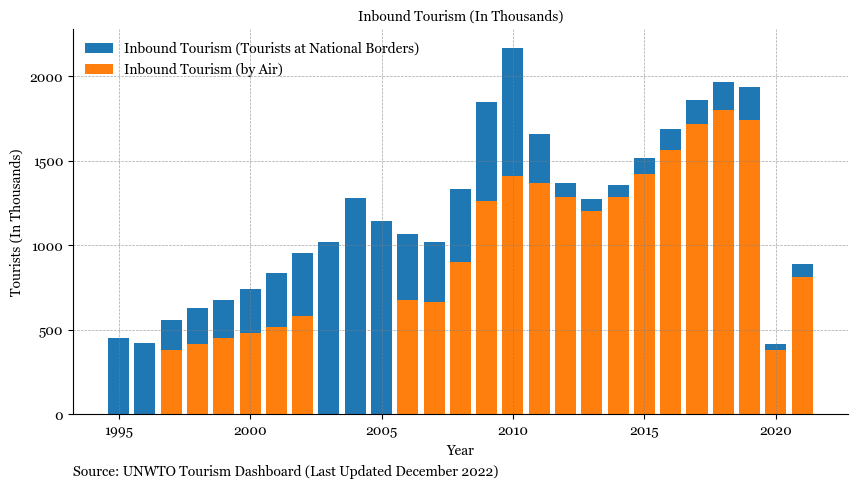

In [242]:
fig, ax = plt.subplots(figsize = (10,5))
plt.rcParams["font.family"] = "Georgia"
# inbound_tourism.plot(ax=ax, label = 'Inbound Tourism')
# inbound_tourism_by_air.plot(ax=ax)

ax.bar(x=inbound_tourism.index, height = inbound_tourism['Inbound Tourism (Total)'], label = 'Inbound Tourism (Tourists at National Borders)')
ax.bar(x=inbound_tourism_by_air.index, height = inbound_tourism_by_air['Inbound Tourism (by Air)'], label = 'Inbound Tourism (by Air)')

legend_without_title = ax.legend(title=None, loc='upper left', frameon=False)

# Hide the right and top spines (axis lines)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.grid(which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

ax.set_title('Inbound Tourism (In Thousands)', font = 'Georgia')
ax.set_xlabel('Year')
ax.set_ylabel('Tourists (In Thousands)')

subtitle = 'Source: UNWTO Tourism Dashboard (Last Updated December 2022)'
ax.text(0, -0.15, subtitle, ha='left', va='center', transform=ax.transAxes,
        fontsize=10, color='black', weight='normal');


### Hotel Occupancy

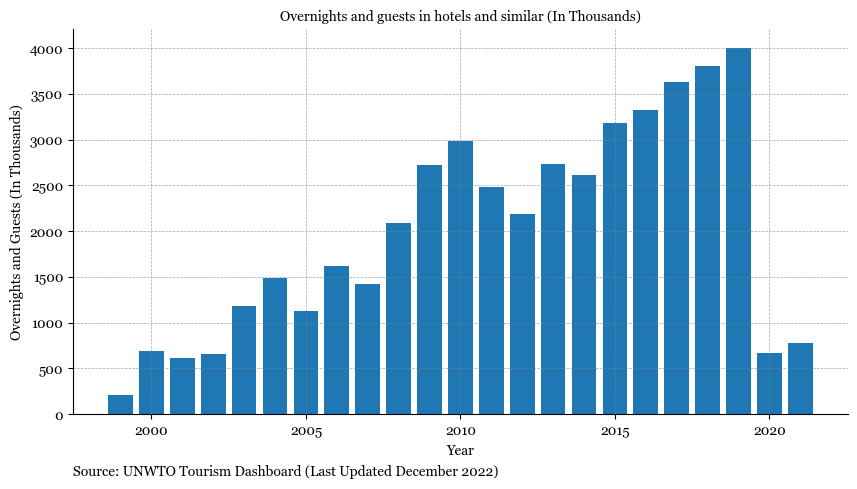

In [243]:
fig, ax = plt.subplots(figsize = (10,5))
plt.rcParams["font.family"] = "Georgia"
# inbound_tourism.plot(ax=ax, label = 'Inbound Tourism')
# inbound_tourism_by_air.plot(ax=ax)

ax.bar(x=hotel_occupancy['Year'], height = hotel_occupancy['Total Accommodation'])

#legend_without_title = ax.legend(title=None, loc='upper left', frameon=False)

# Hide the right and top spines (axis lines)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.grid(which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

ax.set_title('Overnights and guests in hotels and similar (In Thousands)', font = 'Georgia')
ax.set_xlabel('Year')
ax.set_ylabel('Overnights and Guests (In Thousands)');

subtitle = 'Source: UNWTO Tourism Dashboard (Last Updated December 2022)'
ax.text(0, -0.15, subtitle, ha='left', va='center', transform=ax.transAxes,
        fontsize=10, color='black', weight='normal');